In [2]:
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape

In [3]:
df = pd.read_csv("100419_main_input.csv", parse_dates = ['date'])
df.head(3)

,date,price,month,year,day_of_week,100414,100415,100416,100442,100448,100458,100462,100467,100476,101448
0,2019-12-05,1280.0640,12,2019,3,1276.3752,1273.1431,1283.8037,1282.1858,1285.4796,1288.9269,1280.4603,1282.5865,1292.0920,1286.2476
1,2019-12-06,1275.9003,12,2019,4,1271.0579,1269.7292,1278.9882,1279.1871,1282.1477,1286.1161,1277.9297,1277.9011,1284.2635,1283.0789
2,2019-12-07,1272.5594,12,2019,5,1267.8539,1267.1099,1275.4015,1276.7167,1279.7073,1283.8757,1275.2665,1274.5820,1280.6549,1280.5310


In [4]:
forecast_days = 30

In [5]:
order = (5, 1, 1) # using same order as in 3.2.1

In [6]:
# to get (P, D, Q, m) we need to decompose our data

In [7]:
df1 = df.copy()
df1.set_index('date', inplace=True)

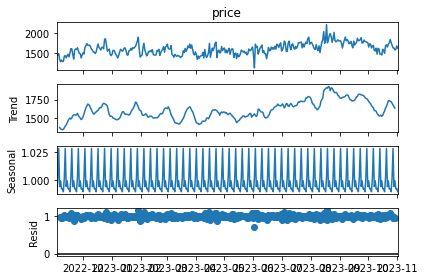

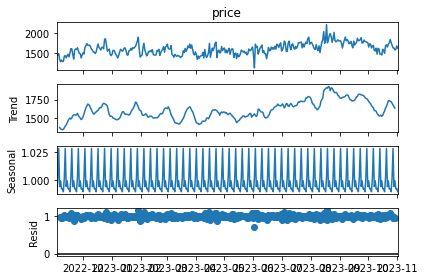

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df1['price'][-365:], model = 'multiplicative').plot()

In [10]:
seasonal_order = (1, 1, 1, 7)

In [11]:
# SARIMA MODEL
warnings.filterwarnings('ignore')
train, test = df[:df.shape[0]-forecast_days]['price'], df[df.shape[0]-forecast_days:]['price']
model = sm.tsa.statespace.SARIMAX(train, order=order, seasonal_order = seasonal_order)
model_fit = model.fit()

In [12]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             price   No. Observations:                 1399
Model:             SARIMAX(5, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -8300.418
Date:                           Sat, 27 Jan 2024   AIC                          16618.837
Time:                                   00:08:00   BIC                          16665.977
Sample:                                        0   HQIC                         16636.464
                                          - 1399                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6046      0.021     28.838      0.000       0.564       0.646
ar.L2          0.0475      0.029      1.666      0.096      -0.008       0.103
ar.L3          0.0294      0.028      1.052      0.293      -0.025       0.084
ar.L4          0.1005      0.030      3.407      0.001       0.043       0.158
ar.L5         -0.0154      0.028     -0.556      0.578      -0.070       0.039
ma.L1         -0.9994      0.016    -63.881      0.000      -1.030      -0.969
ar.S.L7        0.0760      0.024      3.110      0.002       0.028       0.124
ma.S.L7       -1.0000      3.151     -0.317      0.751      -7.176       5.176
sigma2      8625.3577   2.72e+04      0.317      0.751   -4.46e+04    6.19e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               150.27
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -0.12
Prob(H) (two-sided):                  0.60   Kurtosis:                         4.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
yhat = model_fit.forecast(forecast_days)
yhat_pred = model_fit.predict()
yhat_full = pd.concat([yhat_pred, yhat])

<Axes: >

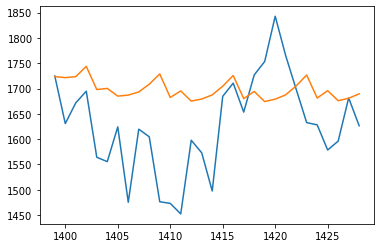

In [14]:
test.plot()
yhat.plot()

In [15]:
rmse = mse(test, yhat, squared = False)
rmse

117.43027561052573

In [16]:
mape_res = mape(test, yhat)
round(mape_res, 3)

0.06

Text(0, 0.5, 'price')

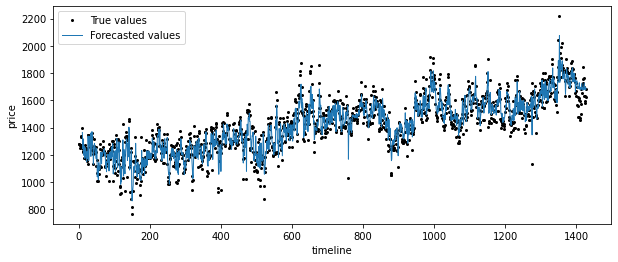

In [26]:
plt.figure(figsize=(10,4))
plt.plot(df['price'], 'o', label = "True values", color='black', markersize=2)
plt.plot(yhat_full[10:], label = "Forecasted values", linewidth = 1)
plt.legend()
plt.xlabel('timeline')
plt.ylabel('price')